<a href="https://colab.research.google.com/github/sachinkun21/Data-Analytics/blob/master/yozoo_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction:
We have 3 excel sheets containing Data related to a subscription based Video Game.
The description of Each Sheet is given below:
- Session: This Sheet contains data related to logging into game by users.
- Level: This Sheet contains Data related to users and their game progression.
- Spender: This sheet contains data related to money spent by the users/players of the game on different in-app purchases and combos


#### **Objective: The goal of analysis is to load the Data set, perform analysis and answer following Questions:**
QUESTIONS-
1. From the given Dataset, determine and analyze Day 1, Day 3, Day 7, Day 15 and Day 30
Retention. (Refer to Session start tab)
2. Create a Funnel of level progression and determine if any areas of the game are acting as
blockers. (Refer to Level Start tab). Also, identify how many times levels are replayed.
3. What percentage of users make first time purchases between levels 1 to 7? (Refer to Spenders
tab)
4. What percentage of users make a repeat purchase? At what level maximum repeat purchases
happen? (Refer to Spenders tab)
5. Which packs generate the maximum revenue? (Refer to Spenders tab)

Important Data features/ Columns are given below:
- Session: Current session of the user. Every time the user opens the game(app) session gets incremented.
So, the first session would be 1 and every time the user will open the app the session number
will increase.
- Level: The current level of the user. 


Funneling: The funnel won't need that many fields to work with. Think of it as something very similar to
a sales funnel. We just want to see a representation of how many players are progressing across every
level. Then you may derive insights using that to find if any particular levels are more difficult, thus may
act as blockers.

**Tech Stack:**
I am Going to use Python using jupyter Notebook hosted on Google Colab.
along with libraries such as numpy and pandas for caclulations, Matplotlib seaborn for visualization

#### Importing Libraries 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Mounting Drive to load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls '/content/drive/My Drive/DataScience'

Assignment.docx  Dataset.xlsx  Employee.csv  Employee_HR.csv  transaction.csv


#### **Loading the Datset:**
Let's load all three sheets into 3 Datframes using pandas read_excel

In [4]:
# Loading levels Data
df_level_start = pd.read_excel('/content/drive/My Drive/DataScience/Dataset.xlsx', parse_dates=['event_date','event_time'])

# printing top 5 rows
df_level_start.head()

,user_id,event_date,event_time,Level__ID,session_nb
0,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 10:28:14,18,4
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 10:01:51,13,9
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,2015-10-14,2015-10-14 09:24:43,1,3
3,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 09:16:08,15,3
4,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 09:17:07,15,3


In [5]:
# Loading spenders data
df_spenders = pd.read_excel('/content/drive/My Drive/DataScience/Dataset.xlsx', parse_dates=['event_date','event_time'], sheet_name = 1)

# printing top 5 rows
df_spenders.head()

,user_id,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency
0,8BF191CF-567A-4977-B2C9-90EC756EFD41,2015-10-01,2015-10-01 05:07:43,3,1,Shop 5750 Tokens,99.989998,EUR
1,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-09-28,2015-09-28 06:22:52,1,1,Shop 17500 Orbs,1.990000,EUR
2,52807659-0332-486C-99E4-84429A1830F3,2015-09-22,2015-09-22 10:54:39,14,1,Shop 490000 Orbs,49.990002,EUR
3,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:25:49,23,5,Shop 510 Tokens,9.990000,EUR
4,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:23:50,23,5,Shop 100 Tokens,1.990000,EUR


In [6]:
# Loading Session data
df_session_start = pd.read_excel('/content/drive/My Drive/DataScience/Dataset.xlsx', parse_dates=['event_date','event_time'], sheet_name = 2)

# printing top 5 rows
df_session_start.head()

,user_id,event_date,event_time,device_name,session_nb,user_country
0,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 10:00:09,iPadAir,9,IN
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 09:56:46,iPadAir,9,IN
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,2015-10-14,2015-10-14 09:23:21,iPhone6,3,CN
3,C47A6FCE-6C76-41FE-9A6A-173AC7F01315,2015-10-14,2015-10-14 09:21:32,iPod5,3,IN
4,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 08:57:33,iPhone6+,3,IN


In [7]:
# Checking Data type and other info of df_session_start 
df_session_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42897 entries, 0 to 42896
Data columns (total 6 columns):
user_id         42897 non-null object
event_date      42897 non-null datetime64[ns]
event_time      42897 non-null datetime64[ns]
device_name     42897 non-null object
session_nb      42897 non-null int64
user_country    42897 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 2.0+ MB


In [98]:
# Checking Data type and other info of df_spenders
df_spenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 10 columns):
user_id            1981 non-null object
event_date         1981 non-null datetime64[ns]
event_time         1981 non-null datetime64[ns]
Level              1981 non-null int64
session_nb         1981 non-null int64
Pack Name          1981 non-null object
money Spent        1981 non-null float64
money_currency     1981 non-null object
INR_conv           1981 non-null float64
Money_Spent_INR    1981 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 154.9+ KB


In [99]:
# Checking Data type and other info of df_level_start
df_level_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22021 entries, 0 to 22020
Data columns (total 5 columns):
user_id       22021 non-null object
event_date    22021 non-null datetime64[ns]
event_time    22021 non-null datetime64[ns]
Level__ID     22021 non-null int64
session_nb    22021 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 860.3+ KB


- So there are no missing values in any of the three Dataframes.

- Also their respective Datatypes also seem to be correct.

- Let's move ahead and see how many Unique users are present in df_session_start dataframe

In [8]:
print("Count of Unique Users: ",df_session_start.user_id.nunique() )
# print("Count of Unique Levels: ",df_session_start.Level.nunique() )
# print("Unique Labels: ")
# df_session_start.Level__ID.unique()

Count of Unique Users:  233


After performing EDA we saw that the dataset is clean.
let's move on and Start solving the Queries.

#### **1. User Retention: Session Start**

In this Requirement, we have to check the Users Retained by the Game on days 1,3,7,15 and 30 Respectively.

1. We will consider the Minimum value of Date Column in Session DataFrame as Day1 and Calculate the values of 3,7,15 and 30 using this day1.

Thus the Values of days will be:
- day1 = '2015-09-22' = Min(date)
- day3 = '2015-09-24' = day1+2
- day7 = '2015-09-28' = day1+6
- day15= '2015-10-06' = day1+14
- day30= '2015-10-21' = day1+29

2. We will than use these dates to calculate the `Newly Acquired customers` count as well as `Retained Customers Count` for each of the above days:
 -  `For Newly Acquired Customers`: We will filter our dataframe for the respective date and Select Unique User_ID which have session value as 1.
 Since whenever a new user logs in the game, He will be assigned session ID as 1.
 - `For Retained Customers`: We will filter our dataset using the same date as previous and Select user_id's based on Following two coditions:
    1. Select userid which were acaquired on the same day.
    2. Filter the userId and select only those for which sessionID is greater than 1.

3. Then, we will calculate the percentage by dividing the count of Retained Customers by the count of Customers acquired on the Same Day.

We will perform the above three steps for each of the 5 days and Create a dict of Percentages which we will use to plot the information on a barchart.

In [100]:
# printing top5 rows of session DataFrame
df_session_start.head()

,user_id,event_date,event_time,device_name,session_nb,user_country
0,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 10:00:09,iPadAir,9,IN
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 09:56:46,iPadAir,9,IN
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,2015-10-14,2015-10-14 09:23:21,iPhone6,3,CN
3,C47A6FCE-6C76-41FE-9A6A-173AC7F01315,2015-10-14,2015-10-14 09:21:32,iPod5,3,IN
4,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 08:57:33,iPhone6+,3,IN


Let's print the Count of unique: 
- Users
- Session_nb
- Dates 

in session_start dataframe

In [10]:
print("Count of Unique Users: ",df_session_start.user_id.nunique() )
print("Count of Unique Sessions: ",df_session_start.session_nb.nunique() )
print("Count of Unique Dates: ",df_session_start.event_date.nunique())

Count of Unique Users:  233
Count of Unique Sessions:  400
Count of Unique Dates:  266


Also Minimum and Maximum value of Event Date

In [11]:
print('Min:{}; Max:{}'.format(min(df_session_start.event_date),max(df_session_start.event_date)))

Min:2015-09-22 00:00:00; Max:2016-06-21 00:00:00


In [0]:
# setting the Minimum value as Day1
day1 = '2015-09-22'

In [13]:
day1_acquired = df_session_start[(df_session_start.event_date==day1) & (df_session_start.session_nb==1)]
day1_acquired.nunique()

user_id          4
event_date       1
event_time      38
device_name      4
session_nb       1
user_country     1
dtype: int64

In [14]:
day1_retained=df_session_start[(df_session_start.event_date==day1) & (df_session_start.session_nb>1) & (df_session_start.user_id.isin(day1_acquired.user_id)) ]
day1_retained.user_id.nunique()

2

In [15]:
(day1_acquired.user_id.nunique()), (day1_retained.user_id.nunique())

(4, 2)

In [0]:
# df_session_start[df_session_start.user_id.isin(day1_acquired.user_id)]

Percentage of Users Retained  on Day 1:

In [17]:
(day1_retained.user_id.nunique())/(day1_acquired.user_id.nunique())*100

50.0

Now we will write a function to calculate and return Percentages of Customers Retained for any day

In [0]:
def customers_retained_percent(date):
  customers_acquired = df_session_start[(df_session_start.event_date==date) & (df_session_start.session_nb==1)]
  customers_retained = df_session_start[(df_session_start.event_date==date) & (df_session_start.session_nb>1) & (df_session_start.user_id.isin(customers_acquired.user_id)) ]
  return (customers_retained .user_id.nunique())/(customers_acquired.user_id.nunique())*100

In [19]:
date = '2015-09-22'
print(customers_retained_percent(date))

50.0


In [101]:
day1 = '2015-09-22'
day3 = '2015-09-24'
day7 = '2015-09-28'
day15= '2015-10-06'
day30= '2015-10-21'


list_of_days = [day1, day3, day7, day15, day30]

retained_percent = {}
for date in list_of_days:
    percent = customers_retained_percent(date)
    retained_percent[date] = (percent)


print(retained_percent)

{'2015-09-22': 50.0, '2015-09-24': 60.0, '2015-09-28': 66.66666666666666, '2015-10-06': 60.0, '2015-10-21': 100.0}


Now lets plot the Percentages using a barchart.

In [107]:
df = pd.DataFrame.from_dict(retained_percent, orient='index', columns=['Percentage_Retained'])
df.index = ['Day1', 'Day3' , 'Day7', 'Day15', 'Day30']
df.head()


,Percentage_Retained
Day1,50.000000
Day3,60.000000
Day7,66.666667
Day15,60.000000
Day30,100.000000


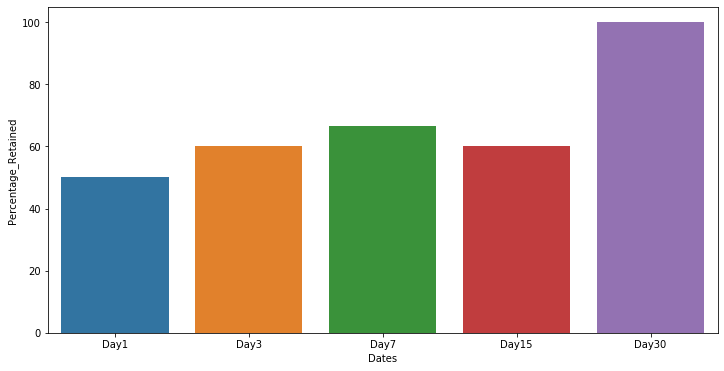

In [109]:
plt.figure(figsize = (12,6))
sns.barplot(x = df.index , y = 'Percentage_Retained', data = df)
plt.xlabel("Dates")
plt.show()

### **2. Funnel:**
#### a.) Create a Funnel of level progression and determine if any areas of the game are acting as blockers
#### b.) Also, identify how many times levels are replayed.


For Creating the `Funnel`:
- We will start with Level 0 and check the UserID's present at 0.
- Next We will check the UserId's present at Level 1 and select only those user ID's which were present at level 0.
- We will use the counts of userID's to calculate the ratio/percentage of users who moved onto level 1 from level 0.
-  We can use the same methodology to create Funnels for other levels as well.

We will calculate the progression rate for top 40 Levels of Game and plot them to Identify which level has a lower progression Rate/

Let's start funneling:



In [21]:
# Printing top 5 rows of level_start df
df_level_start.head()

,user_id,event_date,event_time,Level__ID,session_nb
0,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 10:28:14,18,4
1,FEAE206C-02E5-4610-B2A5-0EC5CBC73BBD,2015-10-14,2015-10-14 10:01:51,13,9
2,DC155AB7-3728-4E8D-A933-1BD7A0BC993A,2015-10-14,2015-10-14 09:24:43,1,3
3,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 09:16:08,15,3
4,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-10-14,2015-10-14 09:17:07,15,3


In [22]:
# Checking Number of Users at each Level
df_level_start.Level__ID.value_counts()

10    2148
1     1792
20    1562
23    1349
2     1297
      ... 
49       1
75       1
51       1
67       1
46       1
Name: Level__ID, Length: 66, dtype: int64

Let's find out total number of Unqiue user Id's in dataframe and Count of Unique userID's at level 0 side by side:

In [110]:
df_level_start.user_id.nunique(),df_level_start[df_level_start.Level__ID==0].user_id.nunique()

(201, 21)

**Writing a reusable function which can take level value and return the Progression percentage using the Algo discussed above:**

In [114]:
def Funnel_level(level):
  Users_from_prev_level = df_level_start[df_level_start.Level__ID==level-1].user_id.unique()
  User_moved_to_Current_level = df_level_start[(df_level_start.Level__ID==level)& (df_level_start.user_id.isin(Users_from_prev_level)) ]
  User_moved_to_Current_level = User_moved_to_Current_level.user_id.unique()
  return round(len(User_moved_to_Current_level)/ len(Users_from_prev_level)*100,2)

# Calulcation Percentage progression of Level 1
print("Level 1 progression Percentage: ", end = '')
Funnel_level(1)


Level 1 progression Percentage: 

80.95

In [25]:
# Printing all the levels 
levels = df_level_start.Level__ID.unique()
levels.sort()
levels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 53,
       55, 57, 64, 65, 67, 69, 70, 75, 76, 81, 82, 88, 90, 96, 99])

As we can see data for some of the labesl like 92 to 94 is not present.
This may be due to very low number or None at all, of people present at higher levels.

So We will calculate the progression percentages for top 40 labels only.

In [115]:
dict_level_perc = {}
for level in range(1,41):
  funnel = Funnel_level(level)
  dict_level_perc[level] = funnel

print(dict_level_perc)

{1: 80.95, 2: 85.57, 3: 78.57, 4: 75.68, 5: 81.03, 6: 78.57, 7: 75.93, 8: 67.39, 9: 59.46, 10: 78.12, 11: 27.12, 12: 73.68, 13: 51.85, 14: 78.79, 15: 73.81, 16: 42.5, 17: 29.41, 18: 47.37, 19: 25.0, 20: 76.47, 21: 43.4, 22: 43.24, 23: 59.26, 24: 28.95, 25: 27.27, 26: 41.18, 27: 20.0, 28: 41.67, 29: 10.0, 30: 66.67, 31: 33.33, 32: 10.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 100.0, 37: 33.33, 38: 0.0, 39: 0.0, 40: 0.0}


In [117]:
# Creating Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_level_perc, orient='index', columns=['Percentage'])
df.head()

,Percentage
1,80.95
2,85.57
3,78.57
4,75.68
5,81.03


**Let's Draw a barplot representing all the Levels and their respectice progression percentage:**

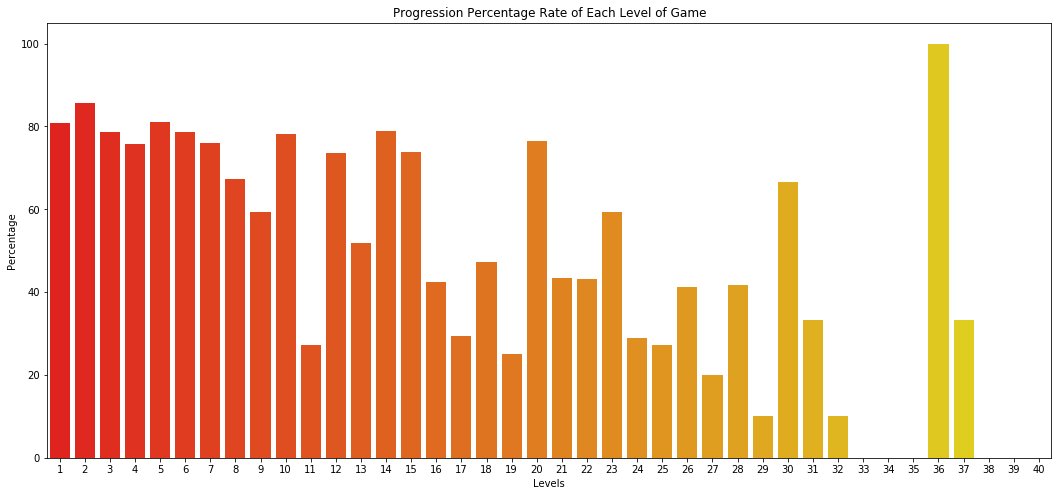

In [119]:
plt.figure(figsize = (18,8))
sns.barplot(x = df.index , y = 'Percentage', data = df, palette = 'autumn')
plt.xlabel("Levels")
plt.title("Progression Percentage Rate of Each Level of Game")
plt.show()

We can see from the graph above:
- Level 11 has a very low percentage of progression compared to other levels near it.
- Level 16,17,18,19 also have a low percentage of progression.
-  The levels after 23 have least percentage but that maybe expained due to very low number of player at that level.
So that's not a blocker.

- Level 11 is acting as the major blocker followed by level 17.

### **3. What percentage of users make first time purchases between levels 1 to 7?**


In [29]:
df_spenders.head()

,user_id,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency
0,8BF191CF-567A-4977-B2C9-90EC756EFD41,2015-10-01,2015-10-01 05:07:43,3,1,Shop 5750 Tokens,99.989998,EUR
1,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-09-28,2015-09-28 06:22:52,1,1,Shop 17500 Orbs,1.990000,EUR
2,52807659-0332-486C-99E4-84429A1830F3,2015-09-22,2015-09-22 10:54:39,14,1,Shop 490000 Orbs,49.990002,EUR
3,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:25:49,23,5,Shop 510 Tokens,9.990000,EUR
4,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:23:50,23,5,Shop 100 Tokens,1.990000,EUR


In [30]:
df_1st_purch_1_to_7 = df_spenders[(df_spenders.session_nb==1) & (df_spenders.Level.isin([1,2,3,4,5,6,7]))]
df_1st_purch_1_to_7.head()


,user_id,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency
0,8BF191CF-567A-4977-B2C9-90EC756EFD41,2015-10-01,2015-10-01 05:07:43,3,1,Shop 5750 Tokens,99.989998,EUR
1,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-09-28,2015-09-28 06:22:52,1,1,Shop 17500 Orbs,1.990000,EUR
8,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 04:40:30,1,1,Shop 510 Tokens,9.990000,EUR
9,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-10-18,2015-10-18 11:24:08,2,1,Shop 250 Tokens,64.989998,NZD
12,6BED1A04-43A3-431D-B908-5CD3E3843B5C,2015-11-05,2015-11-05 14:37:28,2,1,Shop 192500 Orbs,19.990000,EUR


In [31]:
df_1st_purch_1_to_7.user_id.nunique(), df_spenders.user_id.nunique()

(61, 233)

In [32]:
percent = df_1st_purch_1_to_7.user_id.nunique()/ df_spenders.user_id.nunique()*100
print("Percentage of users make first time purchases between levels 1 to 7: ", round(percent,2), "%")

Percentage of users make first time purchases between levels 1 to 7:  26.18 %


Let's Plot a chart to represent this:

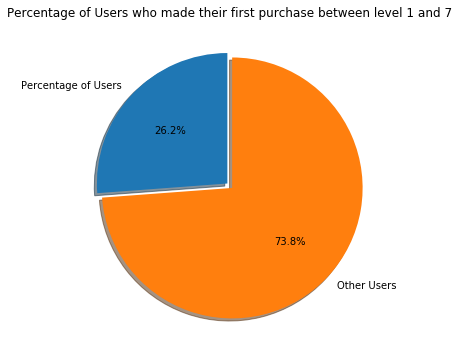

In [33]:
labels = ['Percentage of Users', 'Other Users']
sizes = [round(percent,2), 100-round(percent,2)]
plt.figure(figsize = (10,6))

plt.pie(sizes, explode=[0.025, 0.025], labels=labels,
        shadow=True, autopct='%1.1f%%', startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Users who made their first purchase between level 1 and 7")
plt.show()

#### What percentage of users make a repeat purchase? 
#### At what level maximum repeat purchases happen?

In [34]:
df_spenders.user_id.nunique()

233

In [35]:
groupby_users= df_spenders.groupby(by = 'user_id').count()
groupby_users.head()

,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency
user_id,,,,,,,
011A3515-4A03-4350-9574-25346518A6A6,4,4,4,4,4,4,4
0325F505-2A21-44DA-8A2C-784E9192B241,22,22,22,22,22,22,22
0468B646-70AE-42B9-B0CB-57AA168A42CE,1,1,1,1,1,1,1
07F425F8-EF9C-46FD-8DF8-28682F27C197,2,2,2,2,2,2,2
0861668E-4028-4251-8AEB-B5B306A06041,1,1,1,1,1,1,1


In [36]:
len(groupby_users[groupby_users.event_date>1])

149

In [37]:
len(groupby_users[groupby_users.event_date>1]),df_spenders.user_id.nunique()

(149, 233)

In [38]:
percent = len(groupby_users[groupby_users.event_date>1]) / df_spenders.user_id.nunique()*100
print("Percentage of users making a repeat purchase: ", round(percent,2), "%")

Percentage of users making a repeat purchase:  63.95 %


#### Let's Plot the Graph representing the Percentage of Users who made repeat Purchase:

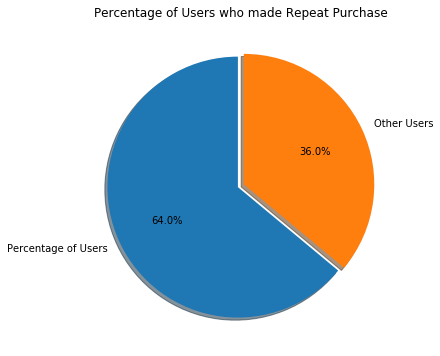

In [39]:
labels = ['Percentage of Users', 'Other Users']
sizes = [round(percent,2), 100-round(percent,2)]
plt.figure(figsize = (10,6))

plt.pie(sizes, explode=[0.025, 0.025], labels=labels,
        shadow=True, autopct='%1.1f%%', startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Users who made Repeat Purchase")
plt.show()

In [40]:
repeat_purchase_level = df_spenders.groupby(by = ['Level']).count().sort_values(by = 'user_id', ascending = False)
repeat_purchase_level.head()

,user_id,event_date,event_time,session_nb,Pack Name,money Spent,money_currency
Level,,,,,,,
1,271,271,271,271,271,271,271
2,192,192,192,192,192,192,192
10,155,155,155,155,155,155,155
0,145,145,145,145,145,145,145
3,144,144,144,144,144,144,144


In [41]:
print("Top 5 levels with maximum repeat purchases are:", repeat_purchase_level.index[:5].values)

Top 5 levels with maximum repeat purchases are: [ 1  2 10  0  3]


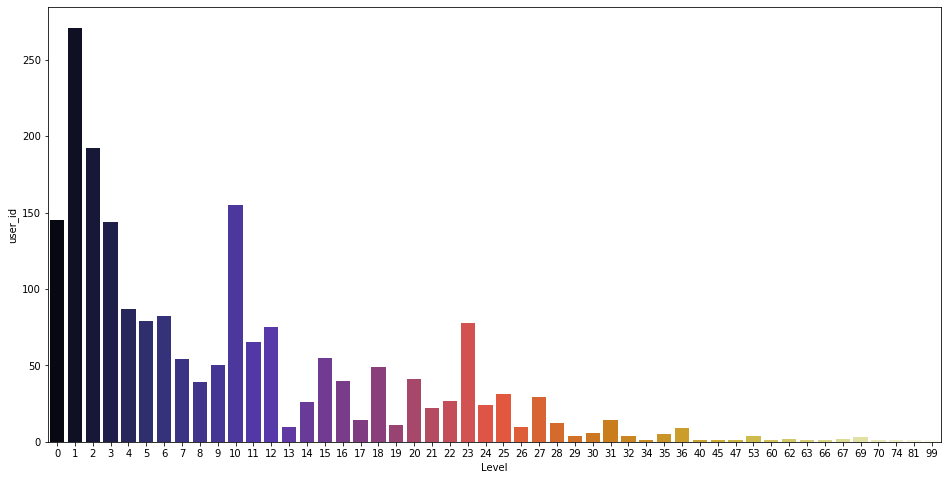

In [79]:
plt.figure(figsize = (16,8))
sns.barplot(x =  repeat_purchase_level.index , y = 'user_id', data = repeat_purchase_level, palette = 'CMRmap')
plt.show()

#### Which packs generate the maximum revenue? (Refer to Spenders tab)

In [54]:
df_spenders.money_currency.unique()

array(['EUR', 'NZD', 'AUD', 'USD', 'GBP', 'INR', 'CAD', 'RUB', '$ AUD'],
      dtype=object)

In [0]:
dict_curr_to_INR = {"EUR": 78.75 , "NZD": 45.40,"USD" :70.55,"AUD": 48.75, "GBP": 91.24, "INR": 1 , "CAD": 53.82, "RUB": 1.11, '$ AUD': 48.75}

In [56]:
df_spenders['INR_conv'] = df_spenders.money_currency.map(dict_curr_to_INR)
df_spenders.head()

,user_id,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency,INR_conv,Money_Spent_INR
0,8BF191CF-567A-4977-B2C9-90EC756EFD41,2015-10-01,2015-10-01 05:07:43,3,1,Shop 5750 Tokens,99.989998,EUR,78.75,7874.212332
1,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-09-28,2015-09-28 06:22:52,1,1,Shop 17500 Orbs,1.990000,EUR,78.75,156.712501
2,52807659-0332-486C-99E4-84429A1830F3,2015-09-22,2015-09-22 10:54:39,14,1,Shop 490000 Orbs,49.990002,EUR,78.75,3936.712632
3,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:25:49,23,5,Shop 510 Tokens,9.990000,EUR,78.75,786.712482
4,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:23:50,23,5,Shop 100 Tokens,1.990000,EUR,78.75,156.712501


In [57]:
df_spenders['INR_conv'].value_counts()

78.75    1382
48.75     253
53.82     249
45.40      44
1.00       22
91.24      21
70.55       7
1.11        3
Name: INR_conv, dtype: int64

In [58]:
df_spenders['money_currency'].value_counts()

EUR      1382
AUD       252
CAD       249
NZD        44
INR        22
GBP        21
USD         7
RUB         3
$ AUD       1
Name: money_currency, dtype: int64

In [59]:
df_spenders.head()

,user_id,event_date,event_time,Level,session_nb,Pack Name,money Spent,money_currency,INR_conv,Money_Spent_INR
0,8BF191CF-567A-4977-B2C9-90EC756EFD41,2015-10-01,2015-10-01 05:07:43,3,1,Shop 5750 Tokens,99.989998,EUR,78.75,7874.212332
1,936BAA84-CDE9-4C8F-A949-5E2CB077A9CE,2015-09-28,2015-09-28 06:22:52,1,1,Shop 17500 Orbs,1.990000,EUR,78.75,156.712501
2,52807659-0332-486C-99E4-84429A1830F3,2015-09-22,2015-09-22 10:54:39,14,1,Shop 490000 Orbs,49.990002,EUR,78.75,3936.712632
3,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:25:49,23,5,Shop 510 Tokens,9.990000,EUR,78.75,786.712482
4,1CE1D120-D2FA-4DAF-80D2-9C5BBDCFB9A5,2015-10-17,2015-10-17 11:23:50,23,5,Shop 100 Tokens,1.990000,EUR,78.75,156.712501


In [60]:
df_spenders["Money_Spent_INR"] = df_spenders['money Spent']* df_spenders['INR_conv']
df_spenders[["Pack Name","Money_Spent_INR"]].head()

,Pack Name,Money_Spent_INR
0,Shop 5750 Tokens,7874.212332
1,Shop 17500 Orbs,156.712501
2,Shop 490000 Orbs,3936.712632
3,Shop 510 Tokens,786.712482
4,Shop 100 Tokens,156.712501


In [61]:
df_revenue_per_pack = df_spenders[["Pack Name","Money_Spent_INR"]].groupby("Pack Name").sum()
df_revenue_per_pack = df_revenue_per_pack.sort_values(by =  'Money_Spent_INR', ascending = False)
df_revenue_per_pack.head()

,Money_Spent_INR
Pack Name,
Shop 5750 Tokens,1.613134e+06
Shop 1006250 Orbs,7.506765e+05
Shop 2800 Tokens,4.001274e+05
Shop 490000 Orbs,2.412642e+05
Shop 510 Tokens,1.236992e+05


In [62]:
print("Top 5 Packs generating Maximum Revenue are: " ,  df_revenue_per_pack.index.values[:5]) 

Top 5 Packs generating Maximum Revenue are:  ['Shop 5750 Tokens' 'Shop 1006250 Orbs' 'Shop 2800 Tokens'
 'Shop 490000 Orbs' 'Shop 510 Tokens']


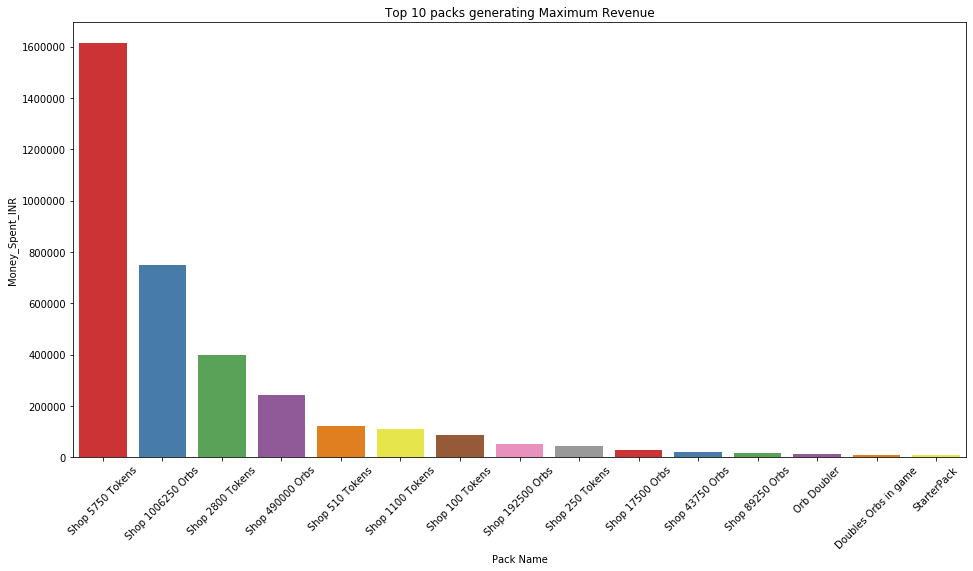

In [63]:
plt.figure(figsize = (16,8))
chart = sns.barplot(x =  df_revenue_per_pack.head(15).index , y = 'Money_Spent_INR', data = df_revenue_per_pack.head(15) , palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Top 10 packs generating Maximum Revenue")
plt.show()

In [64]:
df_revenue_per_pack['Money_Spent_INR'] = df_revenue_per_pack['Money_Spent_INR'].apply(lambda x: '{:.2f}'.format(x))
df_revenue_per_pack.head()

,Money_Spent_INR
Pack Name,
Shop 5750 Tokens,1613134.10
Shop 1006250 Orbs,750676.49
Shop 2800 Tokens,400127.36
Shop 490000 Orbs,241264.20
Shop 510 Tokens,123699.15
